┌ Info: Recompiling stale cache file /Users/jayyao/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/jayyao/.julia/compiled/v1.0/Interpolations/VpKVx.ji for Interpolations [a98d9a8b-a2ab-59e6-89dd-64a1c18fca59]
└ @ Base loading.jl:1190


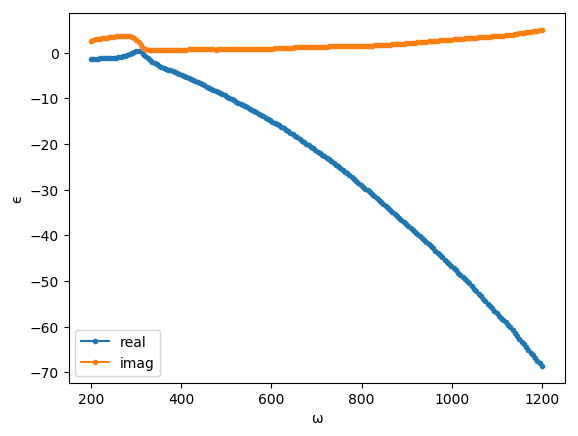

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[2]:27
└ @ Core ./In[2]:27
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[2]:27
└ @ Core ./In[2]:27


PyObject <matplotlib.legend.Legend object at 0x159949278>

In [2]:
using PyPlot, DelimitedFiles, Interpolations
RawData = (open(readdlm,"/Users/jayyao/Documents/Research/LDOS/Materials/METALS_Silver_Palik.txt"))
N = size(RawData)[1]-1

Lambda = RawData[2:end,1]
n = RawData[2:end,2]
k = RawData[2:end,3]

Omega = 2*π*3e8./Lambda*1e6
Epsilon = (n+1im*k).^2

A_x = Omega[end:-1:1]
knots = (A_x,)
Εr = real(Epsilon[end:-1:1])
Εi = imag(Epsilon[end:-1:1])
itpr = interpolate(knots, Εr, Gridded(Linear()))
itpi = interpolate(knots, Εi, Gridded(Linear()))
N = 200
lambda = range(200,stop=1200,length=N)/1e9
omega = zeros(N)
epsilon = zeros(Complex,N)
d = 10e-9
for i=1:N
    k = 2*π/lambda[i]
    ω = k*3e8
    omega[i] = ω
    ϵ = itpr[ω]+itpi[ω]*1im-1
    epsilon[i] = ϵ
end
plot(lambda*1e9,real(epsilon),".-",label="real")
#plot([200,400],[0.5,0.5])
#lambdap = 334
#plot([lambdap,lambdap],[0.0,0.65])
plot(lambda*1e9,imag(epsilon),".-",label="imag")
#xlim([300,350])
xlabel("ω")
ylabel("ϵ")
legend()

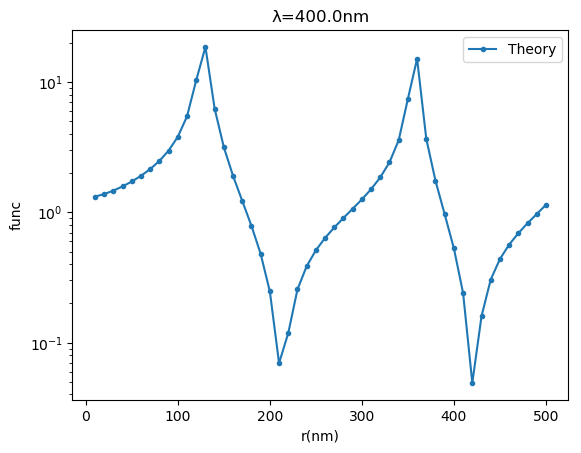

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[73]:6
└ @ Core In[73]:6


PyObject <matplotlib.legend.Legend object at 0x1469b67f0>

In [73]:
using JLD, SpecialFunctions
ρe = load("/Users/jayyao/Documents/Research/LDOS/Program/LDOS02/Sphere_lambda_300_800_d_10_500.jld", "ρe")
λ0 = 400e-9
k0 = 2*π/λ0
ω = k0*3e8
ϵm = itpr[ω]+itpi[ω]*1im
#ϵm = -1.0+0im
ϵd = 1
km = sqrt(ϵm)*k0
kd = sqrt(ϵd)*k0
#a = 1
l = 1
λ=1e-9

fm(x) = ϵm*hankelh1(l+0.5,km*λ*x)*(kd*λ*x*(besselj(l-0.5,kd*λ*x)-besselj(l+1.5,kd*λ*x))+besselj(l+0.5,kd*λ*x))
fd(x) = ϵd*besselj(l+0.5,kd*λ*x)*(km*λ*x*(hankelh1(l-0.5,km*λ*x)-hankelh1(l+1.5,km*λ*x))+hankelh1(l+0.5,km*λ*x))

Na = 50
aA = range(10,stop=500,length=Na)
func2 = zeros(Na)
for i=1:Na
    aa = aA[i]
    func2[i] = 1/abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))
end
semilogy(aA,func2[:],".-",label="Theory")
#semilogy(a,ρe[3,:,1,1],".-",label="Simulation")
xlabel("r(nm)")
ylabel("func")
title("λ=$(λ0*1e9)nm")
legend()


In [83]:
aa = 128
abs((fm(aa)-fd(aa))/(fm(aa)+fd(aa)))

0.048171001854119926

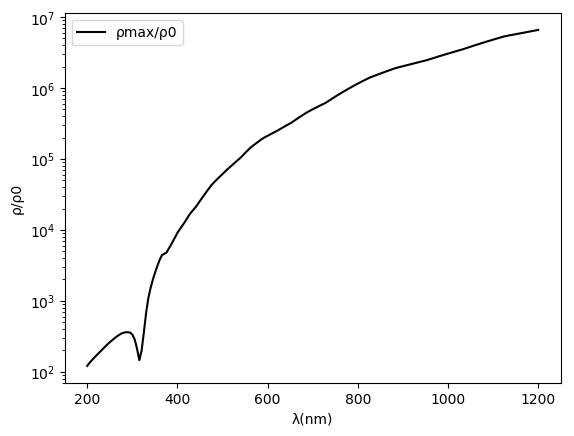

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[45]:10
└ @ Core ./In[45]:10


PyObject <matplotlib.legend.Legend object at 0x13a325a90>

In [45]:
Nh = 100
Nd = 1
N = 200
lambda = range(200,stop=1200,length=N)/1e9
ρmax = zeros(N)
for i=1:N
    k = 2*π/lambda[i]
    d = 10e-9
    ω = k*3e8
    ϵ = itpr[ω]+itpi[ω]*1im
    χ = ϵ - 1
    ρmax[i] = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
end

figure(1)
semilogy(lambda*1e9,ρmax,"k-",label="ρmax/ρ0")
#ylim([2,10^3])
#xlim([200,600])
xlabel("λ(nm)")
ylabel("ρ/ρ0")
legend()

In [4]:
λtest = 550e-9
k = 2*π/λtest
d = 203.5e-9
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[4]:5
└ @ Core In[4]:5


91.7980925911701

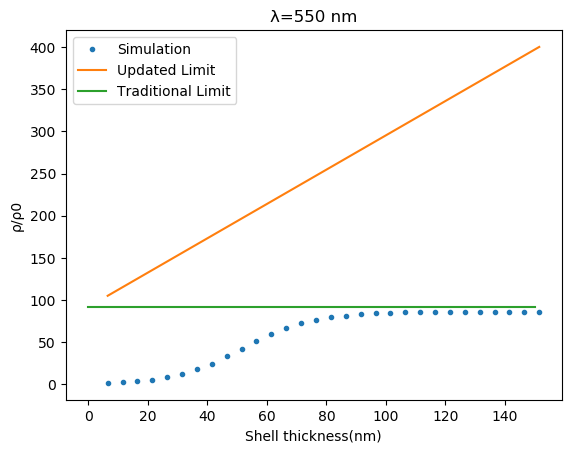

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[16]:41
└ @ Core In[16]:41
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[16]:41
└ @ Core In[16]:41


PyObject <matplotlib.legend.Legend object at 0x1471f6048>

In [16]:
#Shell
Data550=[0.21 0.2035 1.71164
0.215 0.2035 2.56629
0.22 0.2035 3.83952
0.225 0.2035 5.72715
0.23 0.2035 8.46805
0.235 0.2035 12.3866
0.24 0.2035 17.6854
0.245 0.2035 24.6482
0.25 0.2035 33.1763
0.255 0.2035 42.4262
0.26 0.2035 51.8841
0.265 0.2035 60.2041
0.27 0.2035 67.089
0.275 0.2035 72.4793
0.28 0.2035 76.5907
0.285 0.2035 79.5634
0.29 0.2035 81.5905
0.295 0.2035 82.9903
0.3 0.2035 84.0981
0.305 0.2035 84.8757
0.31 0.2035 85.2174
0.315 0.2035 85.6322
0.32 0.2035 85.8447
0.325 0.2035 85.996
0.33 0.2035 86.1364
0.335 0.2035 86.1581
0.34 0.2035 86.1845
0.345 0.2035 86.2641
0.35 0.2035 86.2921
0.355 0.2035 86.2576]
d1 = Data550[:,1]
d2 = Data550[:,2]
ρd = Data550[:,3]
Nd = length(d1)
ρl = zeros(Nd)
λtest = 550e-9
k = 2*π/λtest
d = d2[1]/1e6
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
for i=1:Nd
ρl[i]=((k*d)^-3+1/(k*d)+k*(d1[i]-d2[i])/1e6)*abs(χ^2)/imag(χ)+1
end
plot((d1-d2)*1e3,ρd,".",label="Simulation")
plot((d1-d2)*1e3,ρl,"-",label="Updated Limit")
ρlo = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
plot([0,150],[ρlo,ρlo],"-",label="Traditional Limit")
xlabel("Shell thickness(nm)")
ylabel("ρ/ρ0")
title("λ=550 nm")
legend()

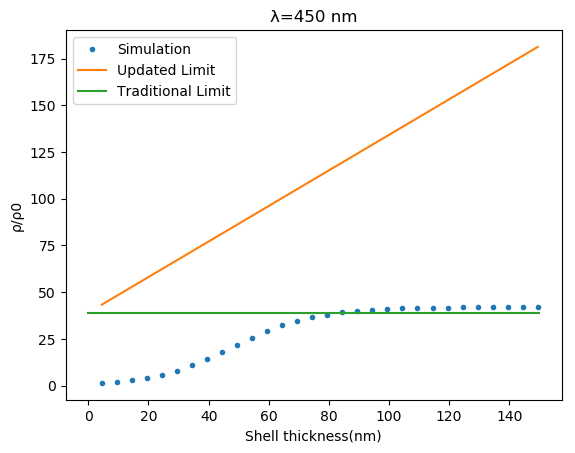

┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[18]:41
└ @ Core In[18]:41
┌ Warning: `getindex(itp::AbstractInterpolation{T, N}, i::Vararg{Number, N}) where {T, N}` is deprecated, use `itp(i...)` instead.
│   caller = top-level scope at In[18]:41
└ @ Core In[18]:41


PyObject <matplotlib.legend.Legend object at 0x147564be0>

In [18]:
#Shell
Data450=[0.16 0.1555 1.40688
0.165 0.1555 2.03576
0.17 0.1555 2.92071
0.175 0.1555 4.14975
0.18 0.1555 5.80794
0.185 0.1555 7.99956
0.19 0.1555 10.7772
0.195 0.1555 14.1043
0.2 0.1555 17.8632
0.205 0.1555 21.8028
0.21 0.1555 25.6692
0.215 0.1555 29.1635
0.22 0.1555 32.1762
0.225 0.1555 34.6178
0.23 0.1555 36.5566
0.235 0.1555 38.0216
0.24 0.1555 39.1292
0.245 0.1555 39.9421
0.25 0.1555 40.5365
0.255 0.1555 40.9649
0.26 0.1555 41.2738
0.265 0.1555 41.4948
0.27 0.1555 41.6519
0.275 0.1555 41.7655
0.28 0.1555 41.8454
0.285 0.1555 41.9018
0.29 0.1555 41.9424
0.295 0.1555 41.9711
0.3 0.1555 41.9911
0.305 0.1555 42.0059]
d1 = Data450[:,1]
d2 = Data450[:,2]
ρd = Data450[:,3]
Nd = length(d1)
ρl = zeros(Nd)
λtest = 450e-9
k = 2*π/λtest
d = d2[1]/1e6
ω = k*3e8
ϵ = itpr[ω]+itpi[ω]*1im
χ = ϵ - 1
for i=1:Nd
ρl[i]=((k*d)^-3+1/(k*d)+k*(d1[i]-d2[i])/1e6)*abs(χ^2)/imag(χ)+1
end
plot((d1-d2)*1e3,ρd,".",label="Simulation")
plot((d1-d2)*1e3,ρl,"-",label="Updated Limit")
ρlo = ((k*d)^-3+1/(k*d))*abs(χ^2)/imag(χ)+1
plot([0,150],[ρlo,ρlo],"-",label="Traditional Limit")
xlabel("Shell thickness(nm)")
ylabel("ρ/ρ0")
title("λ=450 nm")
legend()

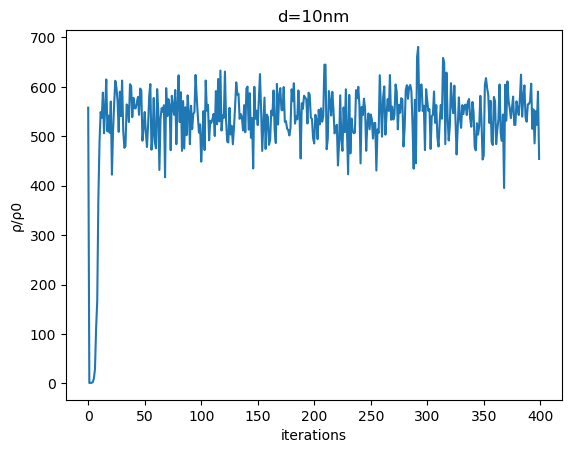

PyObject Text(0.5, 1.0, 'd=10nm')

In [23]:
Data = [#1 rho_s 
#2 coeffs 
557.89 0.01 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
1.0205 0.01 -1.8 2 -1.8 -0.8 1.8 1.8 -1.8 1.8 -1.8 -1.8 1.8 1.8 -1.8 1.8 -1.8 -1.8 1.8 1.8 -1.8 -1.8 -1.8 1.8 -1.8 -1.8 1.8 
1.0185 0.01 -1.8 2 -1.8 -0.8 1.7353 1.51201 -1.8 1.8 -1.8 -1.8 1.73634 1.8 -1.8 1.69106 -1.8 -1.8 1.8 1.69999 -1.75642 -1.8 -1.8 1.8 -1.8 -1.8 1.8 
1.3224 0.01 -1.8 2 -1.8 -0.67962 1.28084 0.845816 -1.8 1.51703 -1.8 -1.63848 1.28322 1.58504 -1.57394 1.18291 -1.8 -1.6831 1.8 1.20218 -1.32979 -1.74874 -1.8 1.74358 -1.8 -1.69776 1.50172 
2.39045 0.01 -1.7229 2 -1.62047 -0.158566 0.532989 0.204655 -1.7163 0.854056 -1.56383 -1.07429 0.535611 0.972268 -0.952112 0.434325 -1.55306 -1.16594 1.44031 0.452371 -0.589217 -1.31183 -1.63231 1.29987 -1.6007 -1.19734 0.829152 
9.77286 0.01 -1.2528 1.48359 -1.03899 0.587572 0.0903178 0.024772 -1.23804 0.20869 -0.934044 -0.343854 0.0910203 0.274171 -0.261933 0.0662538 -0.9151 -0.418953 0.735362 0.0703279 -0.106178 -0.568023 -1.06209 0.554269 -1.00131 -0.447782 0.196687 
28.4949 0.01 -0.747903 1.15259 -0.522281 0.877383 0.0206287 0.00537052 -0.730562 0.052445 -0.430502 -0.0965647 0.0208008 0.072693 -0.0687541 0.0148445 -0.415166 -0.125237 0.286885 0.0158086 -0.0245611 -0.192421 -0.544092 0.1856 -0.487971 -0.137119 0.0489482 
111.746 0.01 -0.389848 1.0534 -0.234887 0.957961 0.00659478 0.00169905 -0.376598 0.0171358 -0.182057 -0.0325203 0.0066506 0.0240836 -0.0227171 0.00472688 -0.173764 -0.0430139 0.110059 0.00503719 -0.00787312 -0.069203 -0.248273 0.0664384 -0.214484 -0.0474799 0.0159549 
167.307 0.01 -0.187101 1.0209 -0.102739 0.983664 0.00250696 0.00064392 -0.179331 0.0065568 -0.077112 -0.0125629 0.00252826 0.00925512 -0.00872261 0.00179481 -0.0732276 -0.016725 0.044603 0.001913 -0.00299528 -0.0273476 -0.109478 0.0262103 -0.0926595 -0.0185126 0.00610049 
373.527 0.01 -0.0852604 1.00864 -0.0445819 0.993262 0.00102563 0.000263146 -0.0813547 0.0026889 -0.0329639 -0.00517027 0.00103436 0.00380152 -0.00358167 0.000733969 -0.0312322 -0.00690015 0.0187064 0.000782358 -0.00122576 -0.0113536 -0.0476935 0.0108741 -0.0399722 -0.00764572 0.0025011 
487.208 0.01 -0.0381018 1.0037 -0.0194674 0.997121 0.000436828 0.000112028 -0.0362759 0.00114633 -0.014299 -0.00220733 0.000440548 0.0016217 -0.00152772 0.000312554 -0.0135344 -0.00294879 0.00804851 0.000333169 -0.000522128 -0.00486438 -0.0208631 0.00465768 -0.0174086 -0.00326881 0.00106615 
548.867 0.01 -0.0169628 1.00161 -0.00857657 0.998743 0.000190397 4.88198e-05 -0.0161334 0.000499843 -0.00628127 -0.000963052 0.000192019 0.00070731 -0.000666284 0.000136221 -0.00594285 -0.00128709 0.00352313 0.000145207 -0.000227587 -0.0021255 -0.00919869 0.00203494 -0.00766066 -0.00142703 0.00046486 
537.38 0.01 -0.0076708 1.00072 -0.00386057 0.999437 8.53078e-05 2.18721e-05 -0.0072924 0.000223994 -0.00282382 -0.000431682 8.60346e-05 0.000317002 -0.000298609 6.10324e-05 -0.00267118 -0.000577032 0.00158145 6.5059e-05 -0.000101973 -0.000953354 -0.00414203 0.000912691 -0.00344655 -0.00063982 0.000208314 
588.258 0.01 -0.00335806 1.00032 -0.00168642 0.999754 3.71859e-05 9.5338e-06 -0.00319173 9.76475e-05 -0.00123281 -0.000188208 3.75028e-05 0.000138201 -0.00013018 2.66039e-05 -0.00116607 -0.0002516 0.000689943 2.83591e-05 -4.44508e-05 -0.000415774 -0.00180966 0.000398031 -0.00150522 -0.000278987 9.08109e-05 
506 0.01 -0.00469926 1.00022 -0.00127624 0.999812 2.79077e-05 0.000285452 -0.00394359 -0.000176208 -0.00191914 -0.000154583 6.50264e-05 0.000131661 0.000200319 -2.07749e-05 -0.00104447 -0.000150114 0.00114146 -0.000224494 3.32595e-05 -0.00029287 -0.00212382 0.000318625 -0.00206723 -0.000497993 4.31794e-05 
556.407 0.01 -0.00359341 1.0003 -0.0016145 0.999765 3.55596e-05 5.79084e-05 -0.0033236 4.96347e-05 -0.00135318 -0.000182314 4.23273e-05 0.000137054 -7.22339e-05 1.82989e-05 -0.00114476 -0.00023381 0.000769116 -1.59708e-05 -3.08287e-05 -0.000394229 -0.00186474 0.000384111 -0.00160377 -0.000317382 8.24616e-05 
614.811 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
510.047 0.01 -0.00369477 1.00031 -0.00168566 0.999767 3.1774e-05 3.30244e-05 -0.00348325 8.10299e-05 -0.00136345 -0.000153365 3.57981e-05 0.00022165 -7.5492e-05 -5.82136e-05 -0.0011939 -0.000226254 0.000771132 2.15187e-05 -5.87025e-05 -0.000399969 -0.00198081 0.000389935 -0.00164278 -0.000297112 8.55919e-05 
541.729 0.01 -0.00341307 1.00031 -0.00167983 0.999757 3.64973e-05 1.62677e-05 -0.00323284 9.16337e-05 -0.00125679 -0.00018419 3.77696e-05 0.000146442 -0.000119459 1.73687e-05 -0.00116692 -0.000247453 0.000705239 2.36569e-05 -4.46413e-05 -0.000412241 -0.00183177 0.00039596 -0.00152791 -0.00028428 8.95322e-05 
506.942 0.01 -0.0033849 1.00031 -0.00167924 0.999755 3.69697e-05 1.4592e-05 -0.00320779 9.26941e-05 -0.00124612 -0.000187272 3.79668e-05 0.000138921 -0.000123856 2.49276e-05 -0.00116423 -0.000249573 0.00069865 2.38707e-05 -4.32351e-05 -0.000413468 -0.00181686 0.000396562 -0.00151642 -0.000282996 8.99263e-05 
570.241 0.01 -0.00338208 1.00031 -0.00167919 0.999755 3.70169e-05 1.44244e-05 -0.00320529 9.28001e-05 -0.00124506 -0.000187581 3.79865e-05 0.000138169 -0.000124295 2.56835e-05 -0.00116396 -0.000249785 0.000697991 2.38921e-05 -4.30945e-05 -0.00041359 -0.00181537 0.000396622 -0.00151527 -0.000282868 8.99657e-05 
422.347 0.01 -0.0033818 1.00031 -0.00167918 0.999755 3.70216e-05 1.44077e-05 -0.00320504 9.28107e-05 -0.00124495 -0.000187611 3.79885e-05 0.000138093 -0.000124339 2.57591e-05 -0.00116393 -0.000249806 0.000697925 2.38942e-05 -4.30805e-05 -0.000413603 -0.00181522 0.000396628 -0.00151516 -0.000282855 8.99696e-05 
511.006 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70221e-05 1.4406e-05 -0.00320501 9.28118e-05 -0.00124494 -0.000187615 3.79886e-05 0.000138086 -0.000124344 2.57666e-05 -0.00116393 -0.000249808 0.000697918 2.38945e-05 -4.30791e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.997e-05 
567.541 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57674e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
612.177 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
598.341 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.457 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
508.825 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.097 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.596 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
612.607 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.126 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
476.516 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
480.184 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
564.389 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
561.351 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
528.796 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
605.275 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
601.734 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
538.525 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
577.674 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.653 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.343 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
567.948 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.463 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.376 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
596.49 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
592.515 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
491.041 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
517.201 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
548.982 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
507.713 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
478.229 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.203 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.033 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
605.531 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
472.695 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
501.65 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
577.461 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
486.966 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
475.584 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
595.383 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.197 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
431.774 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.278 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.906 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
549.388 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.736 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
417.006 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
597.301 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.55 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.043 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.885 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
471.839 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
581.833 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
559.036 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.506 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
593.581 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.942 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.095 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.189 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
528.674 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
589.004 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.461 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
571.23 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
475.191 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
558.66 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
502.054 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.542 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
549.083 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.942 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
561.647 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.395 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
545.124 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
548.839 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.953 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.839 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
541.388 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
507.309 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
524.016 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
448.511 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
497.023 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.773 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
472.077 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
612.678 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.818 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.579 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
491.705 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
531.287 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
527.231 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.449 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
545.189 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
500.453 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
591.335 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
524.127 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
615.799 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.992 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
632.899 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.558 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.07 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.967 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
630.787 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
532.693 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
489.099 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
487.439 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
557.453 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
503.549 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
521.054 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.686 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
517.608 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
560.46 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
609.068 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
584.227 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
585.978 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.266 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.867 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
538.195 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.713 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.897 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
508.038 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
596.511 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
600.407 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.412 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
587.097 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
496.981 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.777 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
434.861 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
599.993 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.268 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.677 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.478 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.898 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
625.732 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.512 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.334 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.019 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.18 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
474.25 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.654 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
539.209 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
482.581 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
492.669 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.771 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.26 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
592.58 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
511.423 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
486.184 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
605.832 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.745 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.766 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
597.351 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.47 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
552.492 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
599.53 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.001 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
530.533 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
515.473 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
512.367 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
501.536 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
516.414 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
594.896 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.868 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
607.199 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
525.466 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.775 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
534.034 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
592.624 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.567 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
455.019 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
566.706 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
555.403 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.068 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.136 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
574.811 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
525.749 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
588.055 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
584.225 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
537.384 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.443 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
495.961 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
485.42 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.471 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
533.262 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
494.147 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
553.447 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.883 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.396 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.319 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.411 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
644.737 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
644.718 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
473.652 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
494.488 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
591.373 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.501 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
541.843 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
589.854 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.444 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
505.704 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.56 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.255 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
440.899 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
485.51 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
582.847 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
493.509 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.364 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
558.229 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
508.102 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
594.941 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
510.219 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
422.989 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
583.516 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
465.216 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.762 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
510.81 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
505.947 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
507.264 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
593.244 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
576.822 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
600.061 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.12 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
445.112 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
559.401 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.67 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.928 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.185 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
470.481 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
525.216 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
546.084 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.108 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.94 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
534.031 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
495.267 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.602 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.979 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
430.583 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.878 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
506.938 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.41 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
558.248 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
499.095 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.053 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
600.743 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
503.152 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.197 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.106 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.267 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
623.787 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
533.44 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
559.893 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
533.731 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.263 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.671 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.493 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.012 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.581 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
547.376 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
577.047 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
574.863 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
479.248 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
516.097 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
593.646 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
603.217 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.726 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
599.821 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
603.653 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
591.081 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
521.731 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
434.409 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
573.738 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
445.296 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
660.207 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
680.675 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.6 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
601.957 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.793 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.864 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
561.683 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
472.019 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
595.234 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
572.092 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
551.241 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.843 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
474.31 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
540.933 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
543.319 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.428 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
527.03 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.91 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
497.691 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
479.172 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
527.285 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.276 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.363 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
658.404 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
648.659 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
483.904 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
628.756 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
541.661 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
491.468 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
519.935 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
607.432 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
565.711 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
546.614 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
602.368 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
530.558 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
463.171 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
517.883 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.619 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.056 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
516.97 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.927 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.749 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
562.37 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
563.979 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.98 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
569.899 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
575.237 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
535.441 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
519.246 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
569.317 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
548.941 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
478.219 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
471.405 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.346 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
503.306 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
520.215 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
581.642 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
531.779 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
453.01 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
460.569 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
603.635 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
617.611 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
597.469 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
583.407 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
526.901 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
571.714 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
488.246 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
482.322 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
579.544 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.961 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
484.133 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
513.025 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
534.401 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.733 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
505.521 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
490.669 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
544.078 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
395.278 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
604.212 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
531.542 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
611.015 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
571.243 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
556.637 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
536.593 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
557.256 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
580.213 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.871 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
522.987 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.579 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.887 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
542.932 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
576.239 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
624.587 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
539.72 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
578.416 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
602.848 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
538.38 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
529.351 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
564.468 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
565.323 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
570.445 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
606.304 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
514.936 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
554.323 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
485.551 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
550.593 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
523.315 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
590.163 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
454.009 0.01 -0.00338177 1.00031 -0.00167918 0.999755 3.70222e-05 1.44058e-05 -0.00320501 9.28119e-05 -0.00124494 -0.000187615 3.79887e-05 0.000138085 -0.000124344 2.57675e-05 -0.00116393 -0.000249808 0.000697917 2.38945e-05 -4.30789e-05 -0.000413604 -0.00181521 0.000396629 -0.00151514 -0.000282854 8.99701e-05 
]
ρ10 = Data[:,1]
plot(ρ10)
xlabel("iterations")
ylabel("ρ/ρ0")
title("d=10nm")

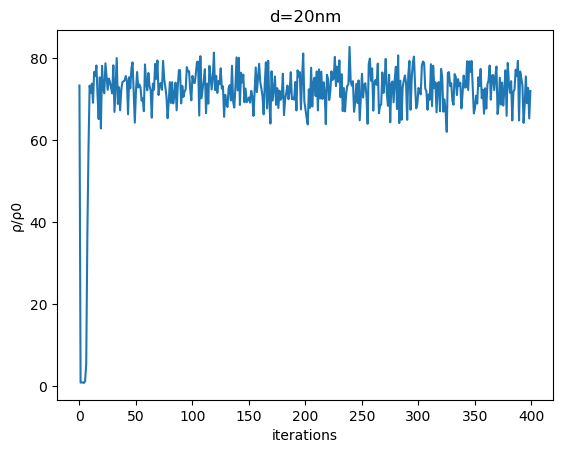

PyObject Text(0.5, 1.0, 'd=20nm')

In [3]:
Data = [73.363 0.02 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0.948524 0.02 -4.5 4.5 -4.5 -4.5 -3.5 -4.5 4.5 4.5 5 4.5 -4.5 -4.5 4.5 -4.5 4.5 4.5 4.5 4.5 -4.5 -4.5 4.5 -4.5 4.5 -4.5 4.5 
0.987868 0.02 -4.5 4.5 -4.5 -4.01081 -3.5 -4.5 4.5 4.5 5 4.09103 -4.5 -4.37654 4.5 -4.33509 4.5 4.5 3.99382 4.5 -4.5 -4.22058 4.5 -3.9934 4.5 -4.5 4.5 
0.950677 0.02 -4.49958 3.65126 -4.1329 -2.52034 -2.66383 -4.10765 3.79528 3.97441 4.72801 2.67547 -3.71673 -3.29049 4.1266 -3.19494 3.71337 3.75472 2.48843 3.85649 -3.89623 -2.94214 4.08238 -2.48765 3.99107 -4.06565 4.49827 
0.864503 0.02 -3.58707 1.91289 -2.75946 -0.742866 -0.931837 -2.70856 2.13959 2.45239 3.03105 0.851958 -2.01329 -1.43278 2.74669 -1.3246 2.00804 2.07358 0.721974 2.24253 -2.31153 -1.07196 2.65839 -0.72147 2.48331 -2.62559 3.58381 
1.28422 0.02 -2.35776 0.698163 -1.3651 -0.179061 0.290085 -1.31594 0.847518 1.08728 1.7736 0.213243 -0.761935 -0.440048 1.35264 -0.391443 0.758509 0.802024 0.172779 0.921913 -0.974209 -0.289723 1.26872 -0.172628 1.11327 -1.2385 2.3531 
5.58193 0.02 -1.32738 0.248225 -0.586461 -0.0549 0.746748 -0.557577 0.314442 0.431864 1.28103 0.0660195 -0.275874 -0.145339 0.579079 -0.127505 0.274365 0.293729 0.0528793 0.34937 -0.374723 -0.0916732 0.530468 -0.052831 0.445456 -0.513437 1.32314 
36.9343 0.02 -0.664858 0.0950776 -0.244734 -0.0200151 0.902873 -0.230994 0.122488 0.173319 1.10855 0.0241376 -0.106415 -0.0542266 0.241205 -0.0473562 0.105792 0.113818 0.0192684 0.137308 -0.148223 -0.0337376 0.218266 -0.0192506 0.17939 -0.210352 0.662061 
57.7366 0.02 -0.313135 0.0391889 -0.104515 -0.00810358 0.959947 -0.098328 0.050817 0.0727775 1.04488 0.00978228 -0.0439802 -0.0221347 0.102922 -0.0192987 0.0437164 0.0471228 0.00779989 0.0571659 -0.0618705 -0.0137042 0.0926309 -0.00779263 0.0754353 -0.0891054 0.311617 
73.3318 0.02 -0.143728 0.0169054 -0.0457629 -0.00347099 0.982718 -0.0429931 0.0219799 0.0316366 1.01939 0.00419164 -0.0189931 -0.0095114 0.0450491 -0.00828737 0.0188781 0.0203649 0.00334068 0.0247619 -0.0268285 -0.00587744 0.0404495 -0.00333756 0.0328119 -0.0388788 0.142983 
71.608 0.02 -0.0658944 0.00753622 -0.0205315 -0.00154271 0.992295 -0.019277 0.0098094 0.0141494 1.00865 0.0018633 -0.0084708 -0.00423309 0.0202081 -0.00368733 0.00841927 0.00908536 0.00148475 0.0110578 -0.0119861 -0.00261367 0.0181263 -0.00148336 0.0146788 -0.0174164 0.065542 
73.8132 0.02 -0.0299031 0.00337622 -0.00922455 -0.000690218 0.996548 -0.00865852 0.00439682 0.00634819 1.00387 0.000833713 -0.0037957 -0.00189504 0.00907858 -0.00165052 0.00377257 0.00407163 0.000664277 0.00495774 -0.00537507 -0.00116965 0.00813961 -0.000663657 0.00658649 -0.00781958 0.0297408 
69.1715 0.02 -0.0380613 0.00340879 -0.0081835 -0.00403792 0.997792 -0.00790319 0.00569858 0.00514183 1.0024 -0.00220028 0.00253727 -6.49454e-05 0.009064 -0.00175468 -0.0028234 0.00342773 0.000920084 0.00344419 -0.00633461 -0.00313166 0.0103477 -0.000332418 0.00740963 -0.00630975 0.0376399 
76.6807 0.02 -0.0331693 0.00338924 -0.00880847 -0.00202895 0.997045 -0.00835666 0.00491713 0.00586602 1.00329 -0.000379478 -0.00126135 -0.00116346 0.00907275 -0.00169214 0.00113281 0.00381431 0.000766497 0.00435275 -0.00575857 -0.00195399 0.00902238 -0.000531292 0.00691546 -0.00721607 0.0329031 
75.6504 0.02 -0.036417 0.00401294 -0.00953295 -0.00232756 0.997021 -0.00799843 0.00601879 0.00556125 1.00305 -0.000518664 -0.00258941 -0.000672645 0.00964648 -0.00205259 0.00230818 0.00418549 0.000690616 0.00403215 -0.00573931 -0.0022019 0.00954627 -0.000411836 0.00684903 -0.00677287 0.0363604 
78.2459 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.0594 0.02 -0.0351804 0.00377952 -0.00930242 -0.00201012 0.99702 -0.00824958 0.00585498 0.00560717 1.00315 -0.00028044 -0.00184772 -0.00100074 0.00945204 -0.00192437 0.00162571 0.00411725 0.000743102 0.00407668 -0.00581774 -0.00207708 0.00900794 -0.000466934 0.00696031 -0.00707447 0.03524 
65.1759 0.02 -0.0346555 0.00367514 -0.00914678 -0.00213442 0.997033 -0.00821033 0.00546013 0.00571591 1.00318 -0.000414851 -0.00183285 -0.000960526 0.00933885 -0.00185838 0.00163461 0.00399524 0.000735395 0.00419427 -0.00576062 -0.00206273 0.00921026 -0.000478125 0.00689821 -0.00703364 0.0345153 
75.3551 0.02 -0.0345704 0.00365821 -0.00912154 -0.00215458 0.997035 -0.00820396 0.00539608 0.00573355 1.00319 -0.000436654 -0.00183044 -0.000954003 0.00932049 -0.00184768 0.00163606 0.00397545 0.000734145 0.00421334 -0.00575135 -0.0020604 0.00924308 -0.00047994 0.00688814 -0.00702702 0.0343977 
62.8938 0.02 -0.0345619 0.00365652 -0.00911901 -0.00215659 0.997035 -0.00820333 0.00538967 0.00573532 1.00319 -0.000438835 -0.0018302 -0.00095335 0.00931865 -0.00184661 0.0016362 0.00397347 0.00073402 0.00421525 -0.00575043 -0.00206017 0.00924636 -0.000480121 0.00688713 -0.00702636 0.0343859 
78.1492 0.02 -0.034561 0.00365635 -0.00911876 -0.0021568 0.997035 -0.00820326 0.00538903 0.00573549 1.00319 -0.000439053 -0.00183018 -0.000953285 0.00931847 -0.0018465 0.00163621 0.00397328 0.000734007 0.00421544 -0.00575033 -0.00206015 0.00924669 -0.00048014 0.00688703 -0.00702629 0.0343848 
72.4638 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538897 0.00573551 1.00319 -0.000439075 -0.00183017 -0.000953279 0.00931845 -0.00184649 0.00163622 0.00397326 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924672 -0.000480141 0.00688702 -0.00702628 0.0343846 
71.4681 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.774 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.5523 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.3027 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.0517 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.3094 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.7771 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.4347 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.2988 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.9253 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.6634 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
80.0499 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.8797 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.9291 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.3069 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.2526 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1906 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.4079 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.5567 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.6883 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.5156 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.3498 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.3788 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.6797 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.5914 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.0055 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.5755 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.3115 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.968 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.6506 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.8742 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.6298 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.0099 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.6561 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.2052 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.106 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.5114 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.0087 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.1979 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.4106 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.2457 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.2762 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.5241 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.8023 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.3505 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.6397 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.98 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.4607 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.0456 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.5632 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.9972 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.2965 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.3575 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.9572 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.9897 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.6917 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.389 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.3714 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1752 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.11 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1764 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.0027 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.1211 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.0587 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.3124 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.0809 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.1227 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.0902 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.0011 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.2577 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.5857 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.9224 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.3917 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.8258 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.8132 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.863 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.3622 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.7539 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.6924 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1098 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.9724 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.2471 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.1035 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.1756 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.0409 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
80.5136 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.2382 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.4809 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.7049 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.3464 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.609 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.8108 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.9375 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.1551 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.6372 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.3877 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.2592 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
81.3766 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.2417 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.7 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.5542 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.4172 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.6724 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.5574 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.5779 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.1727 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.7232 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.0873 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.9443 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.1148 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.6933 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.4548 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.7241 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.1767 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.4266 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.9855 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.9793 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
80.2162 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.1913 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
80.1239 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.6102 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.4808 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1103 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.0058 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.2732 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.6145 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.299 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.797 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.4545 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.1898 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.0663 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.6128 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.9534 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.8856 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.77 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.761 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.2218 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.6509 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1635 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.6278 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.6745 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.3327 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.9388 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.0252 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.7739 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.3835 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.8358 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.0979 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.8189 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.6971 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.7275 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.5531 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.6428 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.7018 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.8706 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.1044 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.8808 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.4894 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.228 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.1467 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.9919 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.5334 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.3416 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.0308 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.9445 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.6063 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.0479 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.3709 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.8983 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.2263 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.2724 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.0591 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.4892 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.6275 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.5184 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.4185 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
81.1623 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.5342 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.4949 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.53 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
63.8751 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.427 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.9265 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.7035 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.2497 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.0964 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.2741 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.79 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.7944 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.2921 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.2831 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.1945 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.7286 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.0767 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1363 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.7589 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
63.9355 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.9784 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.9581 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.8215 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.0353 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.8188 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.7155 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.0154 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
80.3303 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.2217 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.9705 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.2537 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.4828 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.5061 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.0978 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.117 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.7412 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.0594 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.3134 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.2729 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.6709 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
82.7672 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.487 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.297 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.4082 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.9527 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.3737 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.7474 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.1084 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.61 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.8727 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.5798 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.2386 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.4306 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.534 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.9174 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.7145 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.0147 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.6117 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.9383 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.5218 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.5333 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.2284 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.0386 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.7325 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.5244 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.7049 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.6124 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.5427 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.6968 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.5482 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.5574 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.2885 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.849 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.3836 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.4093 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.9868 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.3944 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.8097 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.3504 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.2885 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.7964 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.9379 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.6235 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
80.7196 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.1956 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.5381 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.0029 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.8918 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.515 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.8074 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.0729 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.9953 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.0726 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.3636 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.4375 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.987 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.8825 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
80.4097 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.3724 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.8039 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.8769 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.757 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.1375 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.1921 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.2375 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.226 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.8075 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.6122 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.022 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.4482 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.1843 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.9227 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.5443 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.323 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.1805 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.7188 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1605 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.8121 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.804 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.1894 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.0809 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.415 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.3974 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.9914 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.9767 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.939 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
62.0619 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.4605 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.6148 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.2003 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.9579 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.6822 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.6864 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.1406 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.4516 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.0284 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.9175 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.2148 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.0364 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.7756 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.3509 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.7822 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.8602 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.9214 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.2835 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.2692 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.2566 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.6729 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.3518 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.0499 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.5644 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.9207 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.8753 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.9661 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.3752 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.2155 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.4015 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
70.2681 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.354 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.4888 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.6945 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
67.7174 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.6541 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.6059 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.2378 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.9121 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.8063 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.9132 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.2466 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.5646 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.9916 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
66.4203 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.893 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.24 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.7232 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.0808 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.472 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.2743 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.0755 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.9755 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
78.8503 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.9313 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.5941 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
74.4239 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.8391 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
71.8523 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.4259 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
77.2113 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.6839 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
79.3664 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.8357 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
76.7749 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.158 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
73.3566 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
64.2505 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
68.5974 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
75.5728 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
69.0662 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.7656 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
65.3335 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
72.0156 0.02 -0.0345609 0.00365633 -0.00911873 -0.00215682 0.997035 -0.00820326 0.00538896 0.00573551 1.00319 -0.000439077 -0.00183017 -0.000953278 0.00931845 -0.00184649 0.00163622 0.00397325 0.000734006 0.00421546 -0.00575032 -0.00206014 0.00924673 -0.000480142 0.00688702 -0.00702628 0.0343846 
]
ρ20 = Data[:,1]
plot(ρ20)
xlabel("iterations")
ylabel("ρ/ρ0")
title("d=20nm")

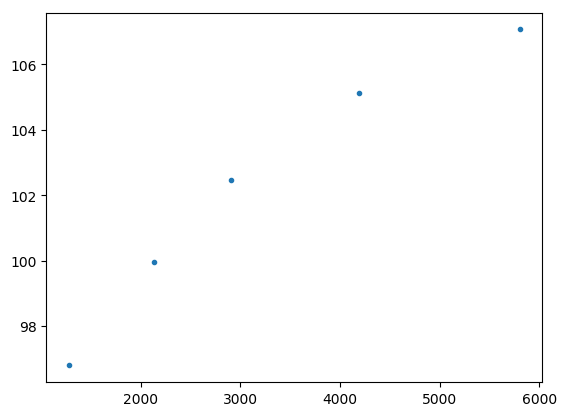

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x16cb1d780>

In [9]:
resolution=[2906 1276 2136 4194 5804]
rho=[102.48 96.7989 99.9697 105.139 107.066]
plot(resolution[:],rho[:],".")

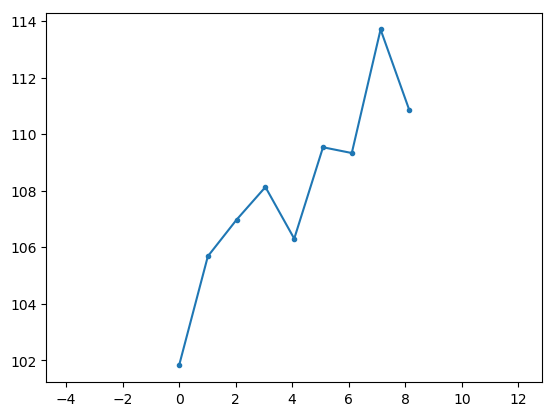

(-0.40725999999999996, 8.55246, 101.2208, 114.2932)

In [29]:
using PyPlot
Data = [101.815 0.02 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
105.678 0.02 0.000123189 -0.000313104 -5.65182e-05 0.00043419 0.997072 -0.000227333 -0.000207371 0.000105672 0.000113267 0.000275041 -0.000394435 -0.000307053 8.49106e-05 -0.00030783 0.000181347 0.000212646 -0.000225873 5.55533e-05 0.00328257 0.000150149 0.000101592 1.93369e-05 2.97743e-05 0.000354253 0.000175023 
106.973 0.02 0.000246378 -0.000626209 -0.000113036 0.000868381 0.994144 -0.000454666 -0.000414743 0.000211344 0.000226534 0.000550081 -0.00078887 -0.000614106 0.000169821 -0.00061566 0.000362694 0.000425291 -0.000451746 0.000111107 0.00656513 0.000300299 0.000203183 3.86738e-05 5.95487e-05 0.000708507 0.000350046 
108.126 0.02 0.000369568 -0.000939313 -0.000169554 0.00130257 0.991216 -0.000681999 -0.000622114 0.000317016 0.000339801 0.000825122 -0.00118331 -0.000921159 0.000254732 -0.00092349 0.000544041 0.000637937 -0.00067762 0.00016666 0.0098477 0.000450448 0.000304775 5.80108e-05 8.9323e-05 0.00106276 0.000525069 
106.3 0.02 0.000492757 -0.00125242 -0.000226073 0.00173676 0.988288 -0.000909331 -0.000829486 0.000422688 0.000453068 0.00110016 -0.00157774 -0.00122821 0.000339642 -0.00123132 0.000725388 0.000850582 -0.000903493 0.000222213 0.0131303 0.000600598 0.000406367 7.73477e-05 0.000119097 0.00141701 0.000700092 
109.533 0.02 0.000615946 -0.00156552 -0.000282591 0.00217095 0.98536 -0.00113666 -0.00103686 0.00052836 0.000566335 0.0013752 -0.00197218 -0.00153527 0.000424553 -0.00153915 0.000906735 0.00106323 -0.00112937 0.000277766 0.0164128 0.000750747 0.000507959 9.66846e-05 0.000148872 0.00177127 0.000875115 
109.329 0.02 0.000739135 -0.00187863 -0.000339109 0.00260514 0.982432 -0.001364 -0.00124423 0.000634031 0.000679602 0.00165024 -0.00236661 -0.00184232 0.000509464 -0.00184698 0.00108808 0.00127587 -0.00135524 0.00033332 0.0196954 0.000900896 0.00060955 0.000116022 0.000178646 0.00212552 0.00105014 
113.699 0.02 0.000862324 -0.00219173 -0.000395627 0.00303933 0.979504 -0.00159133 -0.0014516 0.000739703 0.000792869 0.00192528 -0.00276105 -0.00214937 0.000594374 -0.00215481 0.00126943 0.00148852 -0.00158111 0.000388873 0.022978 0.00105105 0.000711142 0.000135358 0.00020842 0.00247977 0.00122516 
110.841 0.02 0.000985514 -0.00250483 -0.000452145 0.00347352 0.976576 -0.00181866 -0.00165897 0.000845375 0.000906136 0.00220033 -0.00315548 -0.00245642 0.000679285 -0.00246264 0.00145078 0.00170116 -0.00180699 0.000444426 0.0262605 0.0012012 0.000812734 0.000154695 0.000238195 0.00283403 0.00140018 
]
alpha =Data[1,1]/100
Nl = length(Data[:,1])
xx = range(0,stop=(Nl-1),step=1)*alpha
plot(xx,Data[:,1],".-")
axis("equal")

In [17]:
32/26

1.2307692307692308